In [155]:
import pandas as pd


# Sample dataset
file_path = "ic50_MRSA_summary_20240311.xlsx"  # Replace with actual file path
df = pd.read_excel(file_path)
df = df.dropna()
# Extract control peptides
control_peptides = df[df["SampleName"].isin([109, 110, 111])]

# Compute control averages for IC50 values
control_biofilm_avg = control_peptides["IC50 Biofilm"].mean()
control_plank_avg = control_peptides["IC50 Plank"].mean()


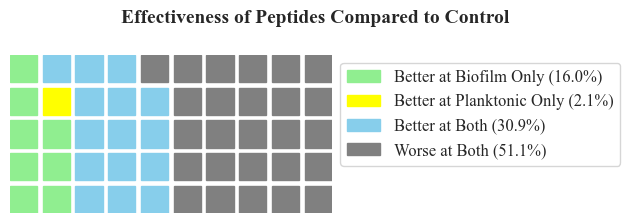

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle
import seaborn as sns

# Set global font to Times New Roman
plt.rcParams["font.family"] = "Times New Roman"

# Sample dataset
file_path = "ic50_MRSA_summary_20240311.xlsx"  # Replace with actual file path
df = pd.read_excel(file_path)
df = df.dropna()

# Extract control peptides
control_peptides = df[df["SampleName"].isin([109, 110, 111])]

# Compute control averages for IC50 values
control_biofilm_avg = control_peptides["IC50 Biofilm"].mean()
control_plank_avg = control_peptides["IC50 Plank"].mean()

# Filter non-control peptides
test_peptides = df[~df["SampleName"].isin([109, 110, 111])]

# Classification based on effectiveness
better_biofilm = ((test_peptides["IC50 Biofilm"] < control_biofilm_avg) & (test_peptides["IC50 Plank"] >= control_plank_avg)).sum()
better_plank = ((test_peptides["IC50 Biofilm"] >= control_biofilm_avg) & (test_peptides["IC50 Plank"] < control_plank_avg)).sum()
both_better = ((test_peptides["IC50 Biofilm"] < control_biofilm_avg) & (test_peptides["IC50 Plank"] < control_plank_avg)).sum()
worse_both = ((test_peptides["IC50 Biofilm"] >= control_biofilm_avg) & (test_peptides["IC50 Plank"] >= control_plank_avg)).sum()

# Waffle plot data
categories = ["Better Biofilm", "Better Plank", "Both Better", "Worse Both"]
counts = [better_biofilm, better_plank, both_better, worse_both]

# Calculate percentages
total = sum(counts)
percentages = [f"{(count / total) * 100:.1f}%" for count in counts]

# Rename legend labels to more understandable names
legend_labels = [
    f"Better at Biofilm Only ({percentages[0]})",
    f"Better at Planktonic Only ({percentages[1]})",
    f"Better at Both ({percentages[2]})",
    f"Worse at Both ({percentages[3]})"
]

# Define custom colors: light green, yellow, blue, and gray
colors = ["#90EE90", "#FFFF00", "#87CEEB", "#808080"]  # Light green, yellow, light blue, gray

# Create a waffle plot
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,  # Number of rows in the waffle plot
    columns=10,  # Number of columns in the waffle plot
    values=counts,  # Values for each category
    labels=legend_labels,  # Updated legend labels with percentages
    colors=colors,  # Use custom colors
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'fontsize': 12},  # Legend position and font size
)

# Add a centered title with two empty lines below it
plt.suptitle(
    "Effectiveness of Peptides Compared to Control", 
    fontsize=14, 
    y=0.7,  # Adjust vertical position to create space
    x=0.5,   # Center the title horizontally
    fontweight="bold"  # Optional: Make the title bold
)

# Adjust layout to ensure the title and plot do not overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect parameter to create space for the title

# Show plot
plt.show()

In [171]:
import pandas as pd
import glob
import os

# Define folder path
folder_path = "Data/3000 Series Arrays - Antibiofilm Data"

# Get all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Read and concatenate all CSV files
df_list = [pd.read_csv(file) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)

#average_df = df.groupby("Sequence")[["IC50 Biofilm", "IC50 Plank"]].mean().reset_index()

#average_df
df = df[['Sequence','IC50 Biofilm','IC50 Plank']]
df["IC50 Biofilm"] = pd.to_numeric(df["IC50 Biofilm"], errors="coerce")
df["IC50 Plank"] = pd.to_numeric(df["IC50 Plank"], errors="coerce")
df = df.dropna()

df11 = df.groupby("Sequence", as_index=False).mean()


In [172]:

# Sample dataset
file_path = "ic50_MRSA_summary_20240311.xlsx"  # Replace with actual file path
df = pd.read_excel(file_path)
df = df.dropna()
df2 = df[~df["SampleName"].isin([109, 110, 111])]
df22 =  df2[['Sequence','IC50 Biofilm','IC50 Plank']]


/var/folders/h2/h1cc1sc57_lg8kj7s4qm7g880000gn/T/ipykernel_11133/1837306585.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/h2/h1cc1sc57_lg8kj7s4qm7g880000gn/T/ipykernel_11133/1837306585.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



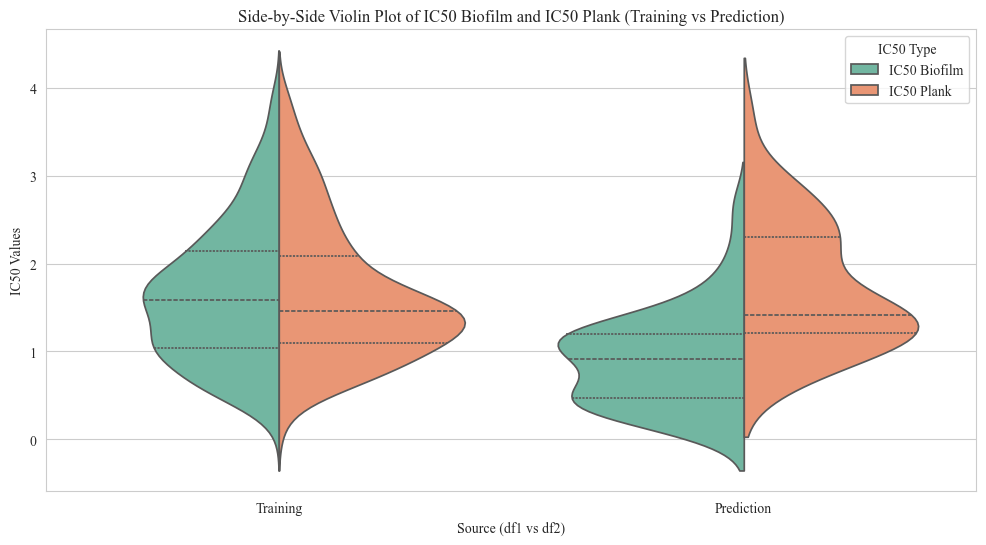

In [232]:

# Filter df1: Keep rows where both values are under 20
df1 = df11[(df11["IC50 Biofilm"] < 4) & (df11["IC50 Plank"] < 4)]
# Filter df2: Keep rows where both values are under 20
df2 = df22[(df22["IC50 Biofilm"] < 4) & (df22["IC50 Plank"] < 4)]
# Add a source column to differentiate df1 and df2
df1["Source"] = "Training"
df2["Source"] = "Prediction"

# Combine both DataFrames into one for plotting
df_combined = pd.concat([df1, df2])

# Melt the DataFrame to get 'IC50 Biofilm' and 'IC50 Plank' in a single column for easy plotting
df_melted = df_combined.melt(id_vars=["Sequence", "Source"], value_vars=["IC50 Biofilm", "IC50 Plank"], var_name="IC50 Type", value_name="Value")

# Create side-by-side violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x="Source", y="Value", hue="IC50 Type", data=df_melted, split=True, inner="quart", palette="Set2")

# Set labels and title
plt.xlabel("Source (df1 vs df2)")
plt.ylabel("IC50 Values")
plt.title("Side-by-Side Violin Plot of IC50 Biofilm and IC50 Plank (Training vs Prediction)")
plt.show()